In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

In [3]:
data0 = pd.read_csv("/Users/ben/Documents/GitHub/CloudComputing/RedditPlaceData/2023_place_canvas_history-000000000000.csv")
data1 = pd.read_csv("/Users/ben/Documents/GitHub/CloudComputing/RedditPlaceData/2023_place_canvas_history-000000000001.csv")
data2 = pd.read_csv("/Users/ben/Documents/GitHub/CloudComputing/RedditPlaceData/2023_place_canvas_history-000000000002.csv")

NameError: name 'data' is not defined

In [4]:
data0.head()

timestamp  \
0  2023-07-20 13:00:26.088 UTC   
1  2023-07-20 13:00:43.658 UTC   
2  2023-07-20 13:00:43.705 UTC   
3  2023-07-20 13:01:02.487 UTC   
4  2023-07-20 13:01:40.445 UTC   

                                                user coordinate pixel_color  
0  no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...  -199,-235     #FFFFFF  
1  qJ7O6cuUNfkDyn+ZOEYR+UiVEmAu/vYfm/s4hK0XJytqAx...     0,-298     #FF4500  
2  uqi5XwkBePwcPKJgGOxHKzzzXuZKU6iKZT+OVfUJfaRKek...   -42,-218     #FFFFFF  
3  rgSTj7FHZUHsLXZLLNj9+vxibHIowb2+UhfFLDYgsVBXqI...  -418,-232     #B44AC0  
4  2bmivBNj8NYvnp/15k0EqC+75T1OxTtCUcRG2pf0c5btzF...    182,164     #FF4500

In [5]:
data = pd.concat([data0, data1, data2]).reset_index()
data.head()

index                    timestamp  \
0      0  2023-07-20 13:00:26.088 UTC   
1      1  2023-07-20 13:00:43.658 UTC   
2      2  2023-07-20 13:00:43.705 UTC   
3      3  2023-07-20 13:01:02.487 UTC   
4      4  2023-07-20 13:01:40.445 UTC   

                                                user coordinate pixel_color  
0  no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...  -199,-235     #FFFFFF  
1  qJ7O6cuUNfkDyn+ZOEYR+UiVEmAu/vYfm/s4hK0XJytqAx...     0,-298     #FF4500  
2  uqi5XwkBePwcPKJgGOxHKzzzXuZKU6iKZT+OVfUJfaRKek...   -42,-218     #FFFFFF  
3  rgSTj7FHZUHsLXZLLNj9+vxibHIowb2+UhfFLDYgsVBXqI...  -418,-232     #B44AC0  
4  2bmivBNj8NYvnp/15k0EqC+75T1OxTtCUcRG2pf0c5btzF...    182,164     #FF4500

In [6]:
def parse_coordinate(coordinate):
    if len(coordinate) < 20:
        return coordinate
    else:
        coordinate = coordinate.replace(" ", "").replace(":", ",").split(",")
        x = coordinate[1]
        y = coordinate[3]
        return f"{x}" + "," + f"{y}"
    
data["coordinate"] = data["coordinate"].apply(parse_coordinate)

In [7]:
data["x"] = data["coordinate"].apply(lambda x: int(x.split(",")[0]))

data["y"] = data["coordinate"].apply(lambda x: int(x.split(",")[1]))

In [8]:
def parse_timestamp(timestamp):
    # Check if the timestamp has microsecond part
    if '.' in timestamp:
        return datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S.%f %Z")
    else:
        return datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S %Z")

data["timestamp"] = pd.to_datetime(data["timestamp"].apply(parse_timestamp))

In [9]:
data["day"] = data["timestamp"].dt.day

data["hour"] = data["timestamp"].dt.hour

data["minute"] = data["timestamp"].dt.minute

data["second"] = data["timestamp"].dt.second

data["microsecond"] = data["timestamp"].dt.microsecond

In [10]:
data

index               timestamp  \
0              0 2023-07-20 13:00:26.088   
1              1 2023-07-20 13:00:43.658   
2              2 2023-07-20 13:00:43.705   
3              3 2023-07-20 13:01:02.487   
4              4 2023-07-20 13:01:40.445   
...          ...                     ...   
7057995  2278783 2023-07-20 19:44:22.581   
7057996  2278784 2023-07-20 19:44:22.582   
7057997  2278785 2023-07-20 19:44:22.582   
7057998  2278786 2023-07-20 19:44:22.582   
7057999  2278787 2023-07-20 19:44:22.582   

                                                      user coordinate  \
0        no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...  -199,-235   
1        qJ7O6cuUNfkDyn+ZOEYR+UiVEmAu/vYfm/s4hK0XJytqAx...     0,-298   
2        uqi5XwkBePwcPKJgGOxHKzzzXuZKU6iKZT+OVfUJfaRKek...   -42,-218   
3        rgSTj7FHZUHsLXZLLNj9+vxibHIowb2+UhfFLDYgsVBXqI...  -418,-232   
4        2bmivBNj8NYvnp/15k0EqC+75T1OxTtCUcRG2pf0c5btzF...    182,164   
...                                                    ...        ...   
7057995  XmhvEndn51oAhwyj82hHRelYxVPtmuq7QwziIXOfTvUkR9...   -310,319   
7057996  Ve845IYkHvgnkIZthQjSxYnViO33PCsL8dpxOpfs4yyKKm...  -251,-378   
7057997  H/msuN+7zDQBy+oR+9+NWIHMJl0QCRxrxFXtpDlN5q9Ul5...   -139,499   
7057998  pX8mt5xXVJUOC6xDSv2TnNG/b3tQRoF7bXng4NTIt074us...   -317,329   
7057999  6M+orwJ4quu8FEVGZtEOXbPqBtCBGr2ib0t8NM4h/KVVPK...    283,355   

        pixel_color    x    y  day  hour  minute  second  microsecond  
0           #FFFFFF -199 -235   20    13       0      26        88000  
1           #FF4500    0 -298   20    13       0      43       658000  
2           #FFFFFF  -42 -218   20    13       0      43       705000  
3           #B44AC0 -418 -232   20    13       1       2       487000  
4           #FF4500  182  164   20    13       1      40       445000  
...             ...  ...  ...  ...   ...     ...     ...          ...  
7057995     #FF4500 -310  319   20    19      44      22       581000  
7057996     #000000 -251 -378   20    19      44      22       582000  
7057997     #FF4500 -139  499   20    19      44      22       582000  
7057998     #FFFFFF -317  329   20    19      44      22       582000  
7057999     #3690EA  283  355   20    19      44      22       582000  

[7058000 rows x 12 columns]

In [11]:
len(data["user"])

7058000

In [12]:
len(pd.unique(data["user"]))

1610835

In [225]:
data["timestamp"][0]

Timestamp('2023-07-20 13:00:26.088000')

In [228]:
data["timestamp"][2359617]

Timestamp('2023-07-20 15:56:56.162000')

In [234]:
# Calculate the amount of time between first and last pixel of this data set
# Expand to do so for each data set
(data["timestamp"][2359617] - data["timestamp"][0]).seconds / (5 * 60)

35.3

In [13]:
data["timestamp"]

0         2023-07-20 13:00:26.088
1         2023-07-20 13:00:43.658
2         2023-07-20 13:00:43.705
3         2023-07-20 13:01:02.487
4         2023-07-20 13:01:40.445
                    ...          
7057995   2023-07-20 19:44:22.581
7057996   2023-07-20 19:44:22.582
7057997   2023-07-20 19:44:22.582
7057998   2023-07-20 19:44:22.582
7057999   2023-07-20 19:44:22.582
Name: timestamp, Length: 7058000, dtype: datetime64[ns]

In [284]:
(data["timestamp"][4779211] - data["timestamp"][2359618]).seconds / (5 * 60)

26.576666666666668

In [14]:
(data["timestamp"][7057998] - data["timestamp"][0]).seconds / (5 * 60)

80.78666666666666

In [301]:
(data["timestamp"][4779211] - data["timestamp"][0]).seconds / (5 * 60)

61.876666666666665

In [285]:
(data["timestamp"][2359617] - data["timestamp"][0]).seconds / (5 * 60)

35.3

In [16]:
pixels_placed = data[["user"]].groupby("user").value_counts().sort_values(ascending=False).reset_index()

In [23]:
pixels_placed[pixels_placed[0] >= 40]

user    0
0      +4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...  987
1      /XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtX...  819
2      ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...  668
3      UJgZrjNi8XJ9UBsHPJTeU9xqeVB59ccxGwfcyx0gANwQWm...  531
4      WCnhKn9Z11VwjSWd7kOUrX3MWOLhEyaF4FUK0Dxu+DieIW...  288
...                                                  ...  ...
13677  AcOPo0GB4WCACZ+qCewJyREaqIBTyHGCbzajm/EAF1Upu5...   40
13678  yRkhmfrlebPXGnj7wLCWWr6LxSRq5PdU5wHUlAuVZJUJuh...   40
13679  1lB/LFDw4YO5N/AFvgkHI8CmwmG5nvNL2yQl2X0CFRsuDv...   40
13680  1Qa/Av2XG/KoIrlw0PlItcdGladiEMxj2U2RFMoK5BPjTn...   40
13681  3udifUQYDP2XC6pkn7e4RMKmgPvGmerBYEQl1m+yeum+AV...   40

[13682 rows x 2 columns]

In [344]:
pixels_placed[pixels_placed[0] >= 40].iloc[4]["user"]

'WCnhKn9Z11VwjSWd7kOUrX3MWOLhEyaF4FUK0Dxu+DieIWLcVMlKYqU80Clhu0iMpQecugmUzYonfun3RGtQIw=='

In [28]:
len(pixels_placed[pixels_placed[0] >= 50]["user"])

5642

In [427]:
pixels_placed[pixels_placed[0] >= 50]["user"]

0       +4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...
1       /XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtX...
2       ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...
3       UJgZrjNi8XJ9UBsHPJTeU9xqeVB59ccxGwfcyx0gANwQWm...
4       WCnhKn9Z11VwjSWd7kOUrX3MWOLhEyaF4FUK0Dxu+DieIW...
                              ...                        
5637    MYn5syPDe+oGM2MsZmV674jxVUUvlf1T7+ZLBueP//3Wr4...
5638    yhJeDysROVJx78fnS1Uz7jyq/0bx1h4xje0HloLMDBu9cs...
5639    D4UFOn/8JDjINX32ajalMMJscX7PF2XCfwwLBSx3dH4jrE...
5640    Lu77+DPoMviQCo9Ana3Q6ygXauyEG/hgOhqZMtDKP2v3ha...
5641    cdSSgVRrZecPcmHq0ppu+SM5X2zAidQReec0AxGr2Uz7sl...
Name: user, Length: 5642, dtype: object

In [32]:
pbs = []

for user in pixels_placed[pixels_placed[0] >= 40]["user"]:
    pbs.append(data[data["user"] == user])


In [33]:
pbs = pd.concat(pbs, ignore_index=False)

pbs

index               timestamp  \
133238    133238 2023-07-20 13:22:44.303   
270036    270036 2023-07-20 13:36:06.186   
350668    350668 2023-07-20 13:43:21.738   
1117420  1117420 2023-07-20 14:41:01.999   
1124769  1124769 2023-07-20 14:41:31.516   
...          ...                     ...   
5941678  1162466 2023-07-20 19:00:25.439   
6125151  1345939 2023-07-20 19:07:41.885   
6668027  1888815 2023-07-20 19:29:32.321   
6807794  2028582 2023-07-20 19:34:50.267   
7022713  2243501 2023-07-20 19:43:02.734   

                                                      user coordinate  \
133238   +4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...    429,443   
270036   +4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...    166,463   
350668   +4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...  -498,-500   
1117420  +4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...   198,-308   
1124769  +4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...   199,-304   
...                                                    ...        ...   
5941678  3udifUQYDP2XC6pkn7e4RMKmgPvGmerBYEQl1m+yeum+AV...  -207,-346   
6125151  3udifUQYDP2XC6pkn7e4RMKmgPvGmerBYEQl1m+yeum+AV...    299,194   
6668027  3udifUQYDP2XC6pkn7e4RMKmgPvGmerBYEQl1m+yeum+AV...   -232,367   
6807794  3udifUQYDP2XC6pkn7e4RMKmgPvGmerBYEQl1m+yeum+AV...   -349,398   
7022713  3udifUQYDP2XC6pkn7e4RMKmgPvGmerBYEQl1m+yeum+AV...   -292,407   

        pixel_color    x    y  day  hour  minute  second  microsecond  
133238      #FFFFFF  429  443   20    13      22      44       303000  
270036      #FFFFFF  166  463   20    13      36       6       186000  
350668      #000000 -498 -500   20    13      43      21       738000  
1117420     #FFFFFF  198 -308   20    14      41       1       999000  
1124769     #FFD635  199 -304   20    14      41      31       516000  
...             ...  ...  ...  ...   ...     ...     ...          ...  
5941678     #000000 -207 -346   20    19       0      25       439000  
6125151     #000000  299  194   20    19       7      41       885000  
6668027     #FFFFFF -232  367   20    19      29      32       321000  
6807794     #FFFFFF -349  398   20    19      34      50       267000  
7022713     #FFFFFF -292  407   20    19      43       2       734000  

[680363 rows x 12 columns]

In [346]:
pb1 = data[data["user"] == '/XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtXRZLw5nwqXSFxU8Ez7u4EM2pc/WCuIQ07Okki1Vew==']
pb2 = data[data["user"] == '+4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+tnQAScZX9RXNjyX6sq+wlIQQthfRPhRVWccf/alQ==']
pb3 = data[data["user"] == 'UJgZrjNi8XJ9UBsHPJTeU9xqeVB59ccxGwfcyx0gANwQWmkLSG9eeYV+UXZWB+tErQ9xQVIQRdrCLstfRrs6tQ==']
pb4 = data[data["user"] == 'ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD1QSn1gerRGhCtGMqewNZKwpcF/LyWn61YF2r3ZDQ==']
pb5 = data[data["user"] == 'WCnhKn9Z11VwjSWd7kOUrX3MWOLhEyaF4FUK0Dxu+DieIWLcVMlKYqU80Clhu0iMpQecugmUzYonfun3RGtQIw==']

pbs = pd.concat([pb1, pb2, pb3, pb4, pb5], ignore_index=False)

In [37]:
tli = pbs.groupby(["x", "y"])["timestamp"].idxmax()

In [39]:
p_pbs = pbs.loc[tli]

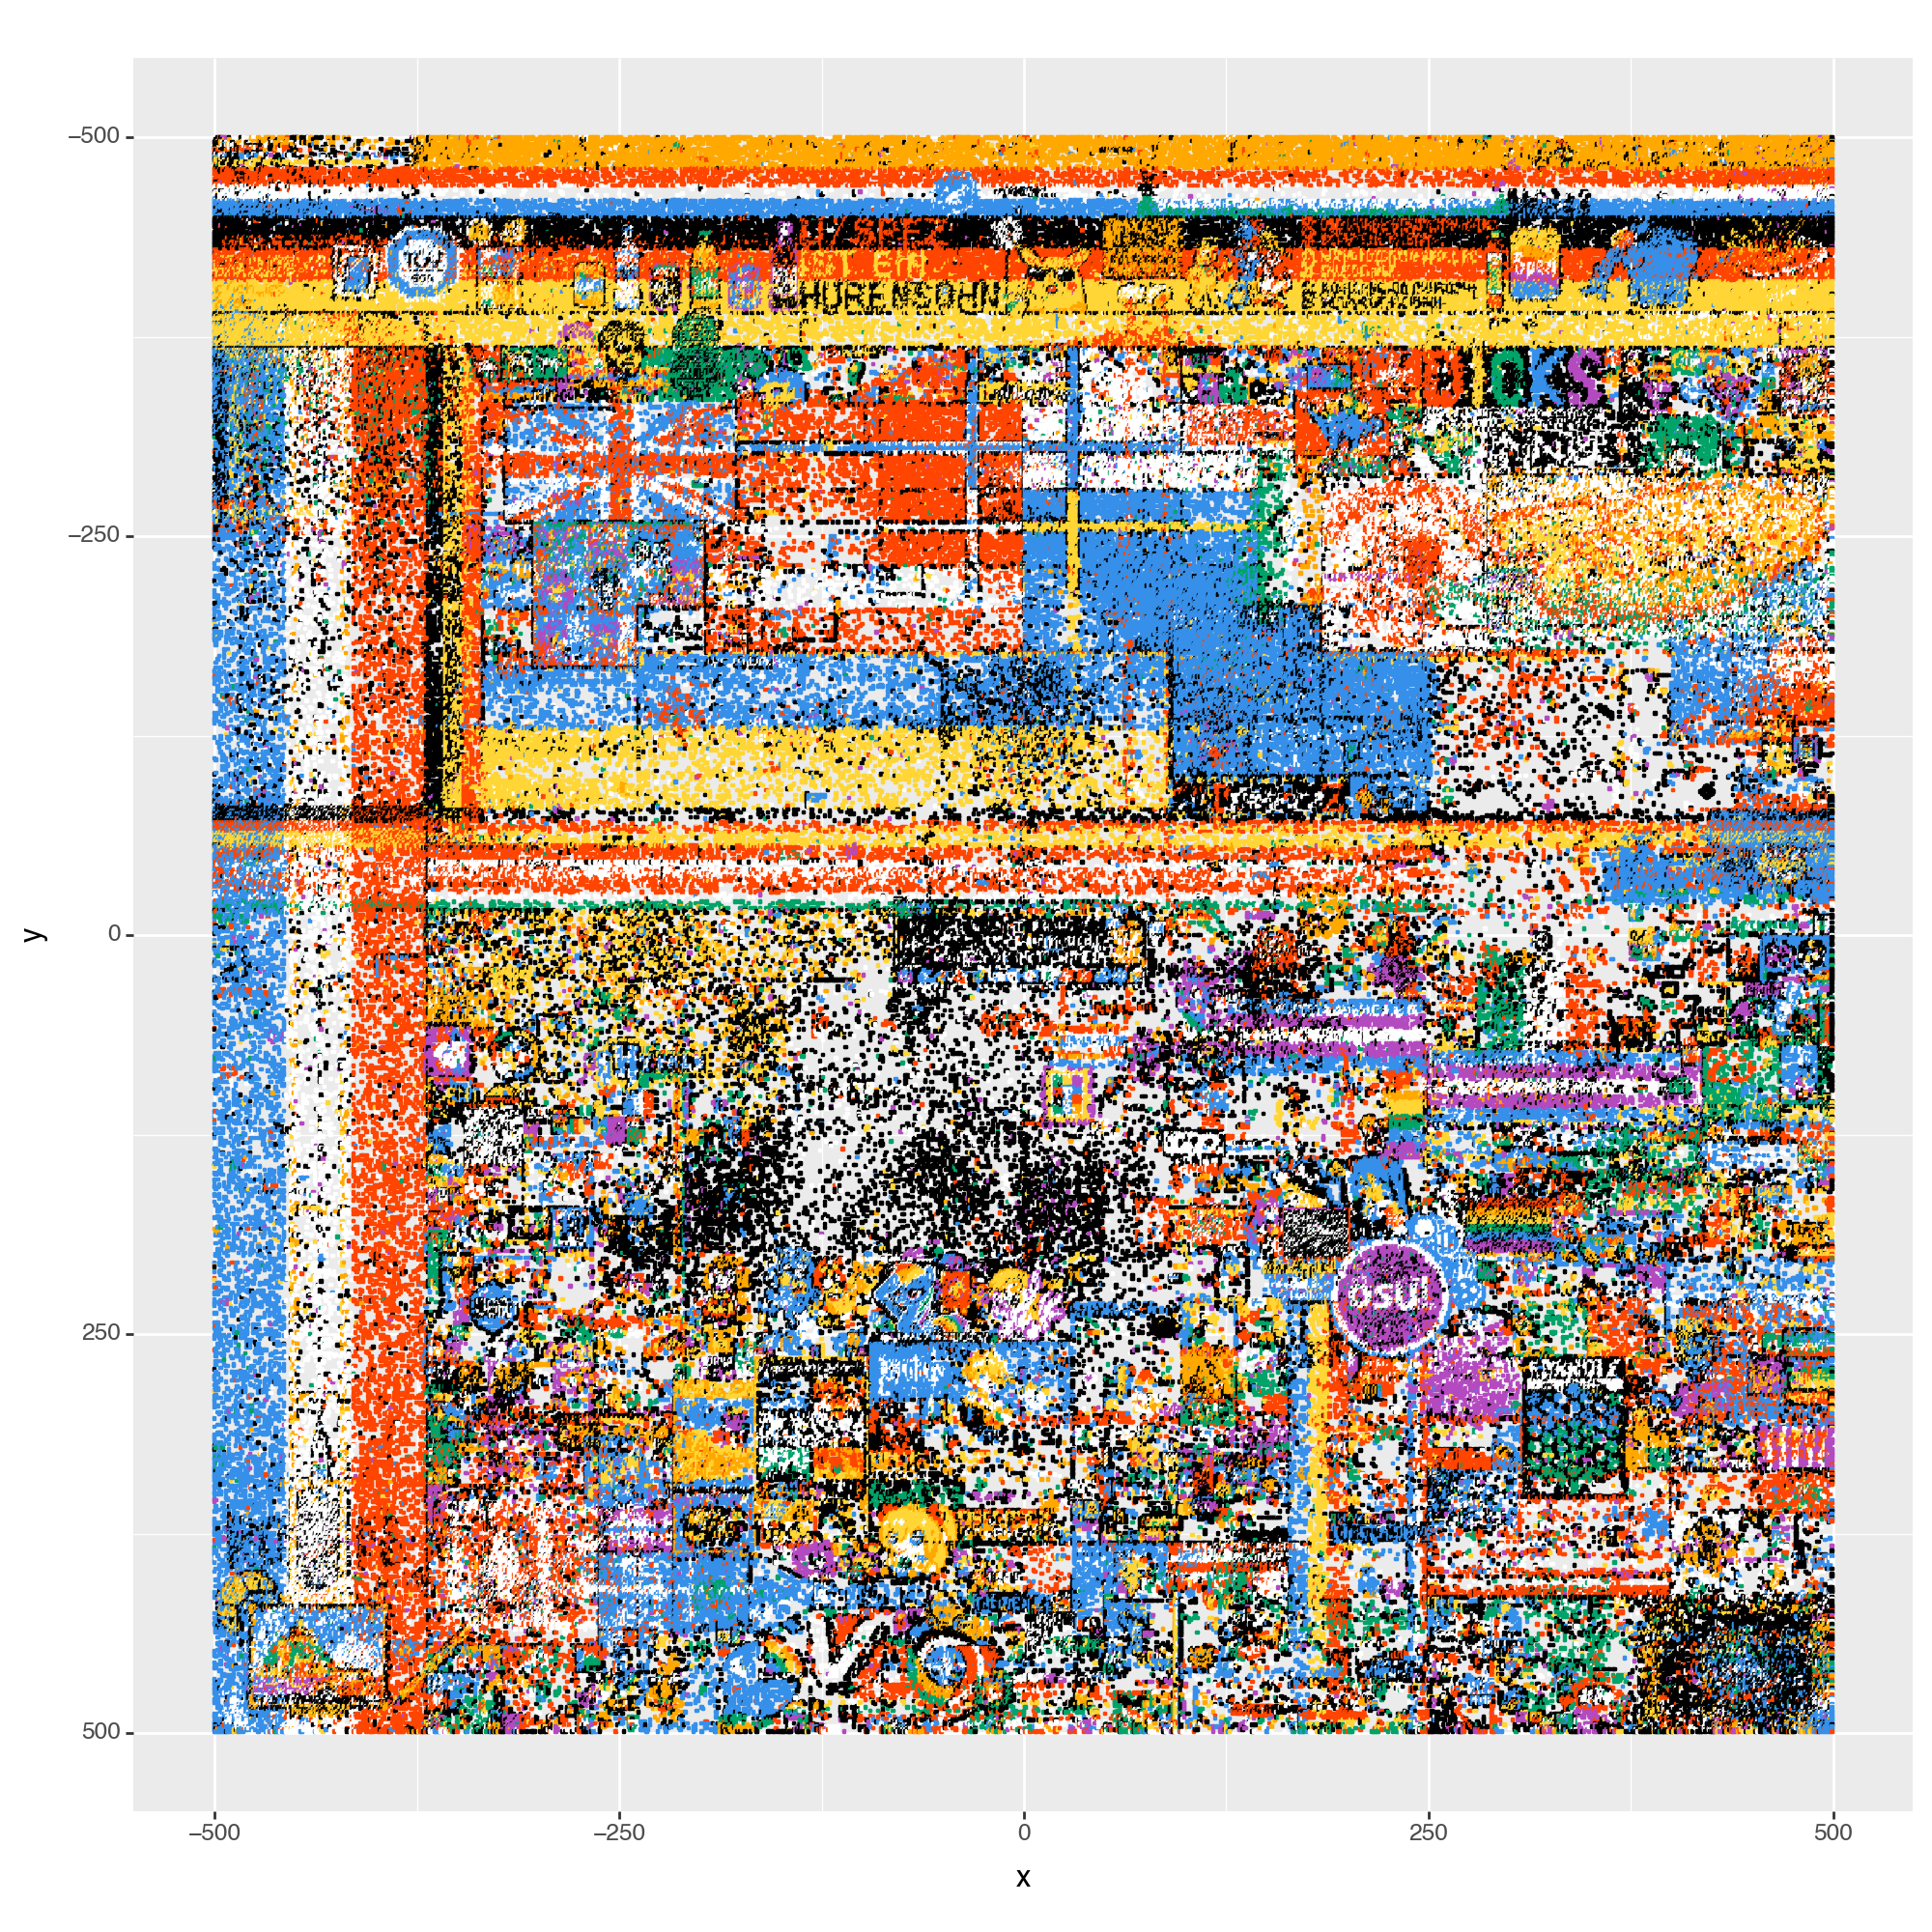

<Figure Size: (1000 x 1000)>

In [40]:
from plotnine import ggplot, aes, geom_point, theme, scale_y_reverse, scale_color_identity
(ggplot(p_pbs, aes(x = "x", y = "y", color = "pixel_color")) + 
    geom_point(shape = "s", size = .01) +
    theme(figure_size=[10, 10]) +
    scale_y_reverse() +
    scale_color_identity())

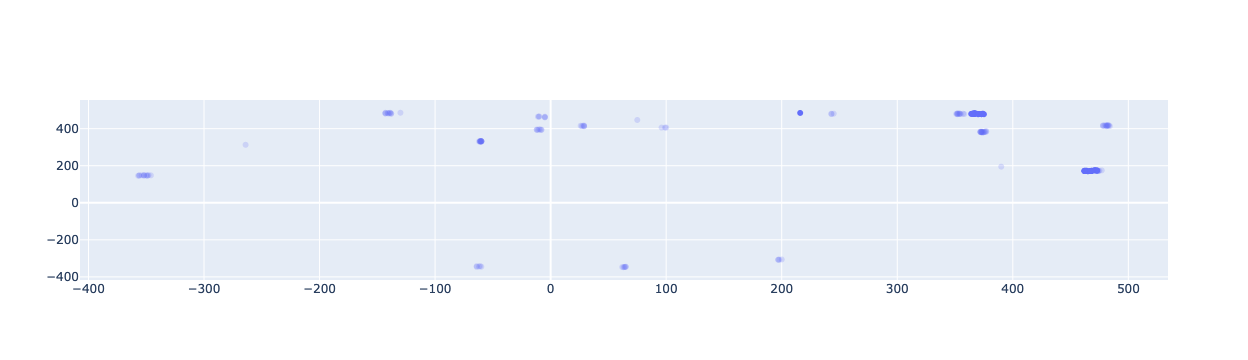

In [223]:
import plotly.graph_objs as go

fig = go.Figure()

trace = go.Scatter(x = pb1["x"], y = pb1["y"], mode = "markers")

fig.add_trace(trace)